In [582]:
#1.6 MILLION UK TRAFFIC ACCIDENTS
#Problem definition and purpose: This dataset contains data from more than 1.6 million traffic accidents in the UK for the years 2000-2016. Through this data set, answers are sought to questions such as the following.

#How does the change of traffic flow affect the accidents?
#What increases accident rates?
#Can we predict accident rates over time?
#How did rural and urban areas differ?


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as stats 
import os
from sklearn import linear_model

In [287]:
### I loaded the csvs into Python
bir=pd.read_csv(r'C:\Users\Veri\Desktop\Yeni klasör\1m ue traf\accidents_2012_to_2014.csv',low_memory=False)
iki=pd.read_csv(r'C:\Users\Veri\Desktop\Yeni klasör\1m ue traf\accidents_2005_to_2007.csv',low_memory=False)
uc=pd.read_csv(r'C:\Users\Veri\Desktop\Yeni klasör\1m ue traf\accidents_2009_to_2011.csv',low_memory=False)
### I combined three tables with the name accidents
kazalar = pd.concat([bir,iki,uc], axis=0)

In [288]:
kazalar.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200.0,178760.0,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930.0,181430.0,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860.0,178080.0,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980.0,181030.0,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170.0,179200.0,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012
5,201201BS70006,526090.0,177600.0,-0.185496,51.483253,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002912,2012
6,201201BS70007,527780.0,179680.0,-0.160418,51.501567,1,3,1,1,12/01/2012,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002818,2012
7,201201BS70008,524010.0,182080.0,-0.213862,51.523975,1,3,2,1,07/01/2012,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002905,2012
8,201201BS70010,527710.0,179290.0,-0.161567,51.498077,1,3,2,1,07/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01002818,2012
9,201201BS70011,525120.0,180060.0,-0.198587,51.505576,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002825,2012


In [289]:
###### kazalar tablosunun sutunlarının data tiplerine baktım
kazalar.shape

(1504150, 33)

In [290]:
### kazalar tablosunun sutunlarının data tiplerine baktım
kazalar.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [291]:
### I saw the sum of the blank cells
kazalar.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [292]:
### I select non-blank cells that work for me and it updates the crashes list.
kazalar = kazalar.loc[:,["Accident_Severity","Number_of_Casualties","Day_of_Week","Date","Time","Local_Authority_(District)"
                         ,"Local_Authority_(Highway)","Road_Type","Speed_limit","Light_Conditions","Weather_Conditions",
                        "Road_Surface_Conditions","Year"]]

In [293]:
kazalar.head(10)

,Accident_Severity,Number_of_Casualties,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year
0,3,1,5,19/01/2012,20:35,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2012
1,3,1,4,04/01/2012,17:00,1,E09000033,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2012
2,3,1,3,10/01/2012,10:07,12,E09000020,One way street,30,Daylight: Street light present,Fine without high winds,Dry,2012
3,3,1,4,18/01/2012,12:20,12,E09000020,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,2012
4,3,1,3,17/01/2012,20:24,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2012
5,3,1,5,19/01/2012,07:30,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,2012
6,3,1,5,12/01/2012,14:00,1,E09000033,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,2012
7,3,1,7,07/01/2012,11:29,12,E09000020,Roundabout,30,Daylight: Street light present,Fine without high winds,Dry,2012
8,3,1,7,07/01/2012,13:55,12,E09000020,One way street,30,Daylight: Street light present,Fine without high winds,Dry,2012
9,3,1,4,04/01/2012,19:40,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,2012


In [294]:
###I have listed the empty cells in the table I just created to see.
kazalar.isnull().sum()

Accident_Severity                0
Number_of_Casualties             0
Day_of_Week                      0
Date                             0
Time                           117
Local_Authority_(District)       0
Local_Authority_(Highway)        0
Road_Type                        0
Speed_limit                      0
Light_Conditions                 0
Weather_Conditions             126
Road_Surface_Conditions       1958
Year                             0
dtype: int64

In [295]:
###How many dimensions am I looking at my new painting?
kazalar.shape

(1504150, 13)

In [296]:
###Deleting empty cells and checking the size
kazalar = kazalar.dropna()
kazalar.shape

(1501957, 13)

In [297]:
###I'm checking to see if there are any empty cells left
kazalar.isnull().sum()

Accident_Severity             0
Number_of_Casualties          0
Day_of_Week                   0
Date                          0
Time                          0
Local_Authority_(District)    0
Local_Authority_(Highway)     0
Road_Type                     0
Speed_limit                   0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions       0
Year                          0
dtype: int64

In [298]:
#####I will create some tables that I will need

In [299]:
### Yıllara göre kaza sayılarını gösteren basit bir tablo oluşturacam
kaza_sayisi = kazalar.groupby("Year") ## kaza sayılarını yıllara göre grupluyorum
toplam_kaza_sayisi=pd.DataFrame(kaza_sayisi.size(),columns=["Sayı"]) ## oluşturduğum tabloyu df tanımlıyorum ve sutüna isim veriyorum

toplam_kaza_sayisi.head(10)

,Sayı
Year,
2005,198474
2006,188913
2007,181881
2009,163334
2010,154185
2011,151241
2012,179436
2013,138393
2014,146100


In [300]:
###Average number of accidents
ortalama = kaza_sayisi.Accident_Severity.mean()
print(ortalama)

Year
2005    2.844735
2006    2.837100
2007    2.836552
2009    2.840235
2010    2.845108
2011    2.837703
2012    2.829945
2013    2.835230
2014    2.835948
Name: Accident_Severity, dtype: float64


In [301]:
###Average number of accidents in years
toplam_kaza_sayisi.mean()

Sayı    166884.111111
dtype: float64

In [302]:
#### When we look at the average number of accidents, we see that the averages of the years are close to each other.
#### Buddha shows us that there is no year-based change
#### We can continue our process by taking any year as a sample.
#### For the most optimal year, I choose the year 2009 as the sample, which is closest to the average of years 166884

In [313]:
### Örneklem olarak 2009 yılını seçtik ve analizimizi bu örneklem üzerinden yapacağız
orneklem = kazalar[kazalar.Year ==2009]

In [527]:
orneklem.describe()

,Accident_Severity,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Speed_limit,Year
count,163334.000000,163334.000000,163334.000000,163334.000000,163334.000000,163334.0
mean,2.840235,1.358345,4.120936,355.091512,39.030453,2009.0
std,0.399254,0.814151,1.924127,260.280826,14.091743,0.0
min,1.000000,1.000000,1.000000,1.000000,10.000000,2009.0
25%,3.000000,1.000000,3.000000,128.000000,30.000000,2009.0
50%,3.000000,1.000000,4.000000,324.000000,30.000000,2009.0
75%,3.000000,1.000000,6.000000,532.000000,50.000000,2009.0
max,3.000000,48.000000,7.000000,941.000000,70.000000,2009.0


In [379]:
##########################How does a change in traffic flow affect accidents?

# What is meant by traffic flow here is the road type.
# One way street
# Single carriageway
# Dual carriageway, etc. Does it have any effect in the event of an accident?

In [381]:
### What increases accident rates?
### We make comparisons from our 2009 table that we took as a sample.

In [321]:
# We group accident numbers and traffic flow
orneklem.Road_Type
trafikakisi = orneklem.groupby("Road_Type") 
trafikakisi_tablo=pd.DataFrame(trafikakisi.size(),columns=["Accident_intensity"]) 

trafikakisi_tablo.head(10)

,Accident_intensity
Road_Type,
Dual carriageway,24033
One way street,3260
Roundabout,11019
Single carriageway,122409
Slip road,1697
Unknown,916


In [483]:
### We can say that traffic flow affects the accident rate at a noticeable level, but if we were to do a statistical test
### Since we have grouped accidents by path, groups are used to examine the relationship between multiple variables.
### We should have used Regression Analysis
orneklem

,Accident_Severity,Number_of_Casualties,Day_of_Week,Date,Time,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year
0,2,1,5,01/01/2009,15:11,12,E09000020,One way street,30,Daylight: Street light present,Fine without high winds,Dry,2009
1,2,11,2,05/01/2009,10:59,12,E09000020,Single carriageway,30,Daylight: Street light present,Fine without high winds,Wet/Damp,2009
2,3,1,1,04/01/2009,14:19,12,E09000020,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,2009
3,2,1,2,05/01/2009,08:10,12,E09000020,Single carriageway,30,Daylight: Street light present,Other,Frost/Ice,2009
4,2,1,3,06/01/2009,17:25,12,E09000020,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163549,2,1,3,15/12/2009,06:25,917,S12000006,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Dry,2009
163550,2,1,1,20/12/2009,21:12,917,S12000006,Slip road,70,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2009
163551,3,1,4,23/12/2009,09:45,917,S12000006,Single carriageway,30,Daylight: Street light present,Snowing with high winds,Frost/Ice,2009
163552,3,1,2,21/12/2009,21:49,917,S12000006,Single carriageway,30,Darkness: Street lights present and lit,Other,Frost/Ice,2009


In [474]:
########################What increases accident rates?
### I'm grouping variables by accident numbers.

In [535]:
orneklem.Day_of_Week
Day_of_Week = orneklem.groupby("Day_of_Week") 
Day_of_Week_tablo=pd.DataFrame(Day_of_Week.size(),columns=["Day_of_Week_total"]) 


orneklem.Date
Date = orneklem.groupby("Date") 
Date_tablo=pd.DataFrame(Date.size(),columns=["Date_total"]) 


orneklem.Time
Time = orneklem.groupby("Time") 
Time_tablo=pd.DataFrame(Time.size(),columns=["Time_total"]) 


orneklem.Speed_limit
Speed_limit = orneklem.groupby("Speed_limit") 
Speed_limit_tablo=pd.DataFrame(Speed_limit.size(),columns=["Speed_limit_total"]) 

orneklem.Road_Type
Road_Type = orneklem.groupby("Road_Type") 
Road_Type_tablo=pd.DataFrame(Road_Type.size(),columns=["Road_Type_total"]) 


orneklem.Light_Conditions
Light_Conditions = orneklem.groupby("Light_Conditions") 
Light_Conditions_tablo=pd.DataFrame(Light_Conditions.size(),columns=["Light_Conditions_total"]) 


orneklem.Weather_Conditions
Weather_Conditions = orneklem.groupby("Weather_Conditions") 
Weather_Conditions_tablo=pd.DataFrame(Weather_Conditions.size(),columns=["Weather_Conditions_total"]) 


orneklem.Road_Surface_Conditions
Road_Surface_Conditions = orneklem.groupby("Road_Surface_Conditions") 
Road_Surface_Conditions_tablo=pd.DataFrame(Road_Surface_Conditions.size(),columns=["Road_Surface_Conditions_total"]) 


In [544]:
Day_of_Week_tablo

,Day_of_Week_total
Day_of_Week,
1,17844
2,22944
3,24751
4,24763
5,24270
6,26632
7,22130


Text(0.5, 1.0, 'Day_of_Week_tablo')

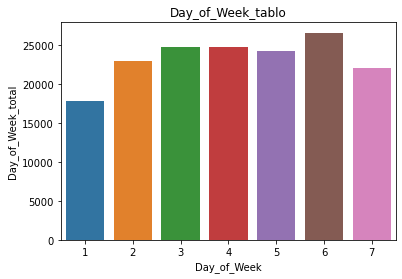

In [573]:
sns.barplot(y = Day_of_Week_tablo["Day_of_Week_total"] , x = Day_of_Week_tablo.index)
plt.title("Day_of_Week_tablo")

In [566]:
Date_tablo

,Date_total
Date,
01/01/2009,244
01/02/2009,319
01/03/2009,311
01/04/2009,452
01/05/2009,605
...,...
31/05/2009,446
31/07/2009,523
31/08/2009,325


Text(0.5, 1.0, 'Date_tablo')

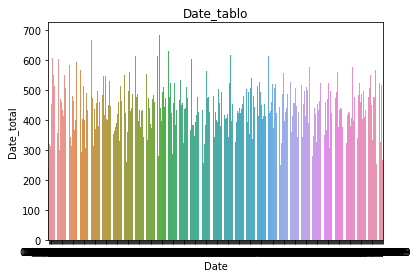

In [567]:
sns.barplot(y = Date_tablo["Date_total"] , x = Date_tablo.index)
plt.title("Date_total")

In [546]:
Time_tablo

,Time_total
Time,
00:01,242
00:02,39
00:03,28
00:04,23
00:05,125
...,...
23:55,109
23:56,20
23:57,19


Text(0.5, 1.0, 'Time_tablo')

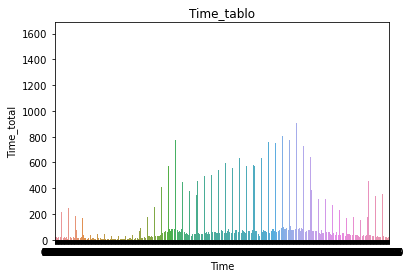

In [574]:
sns.barplot(y = Time_tablo["Time_total"] , x = Time_tablo.index)
plt.title("Time_tablo")

In [547]:
Speed_limit_tablo 

,Speed_limit_total
Speed_limit,
10,2
15,2
20,1507
30,105249
40,13530
50,5322
60,26050
70,11672


Text(0.5, 1.0, 'Speed_limit_tablo')

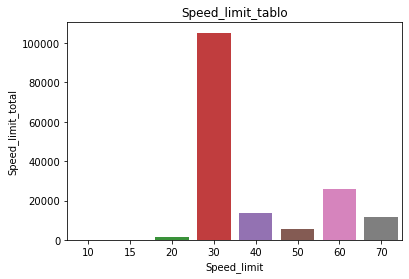

In [575]:
sns.barplot(y = Speed_limit_tablo["Speed_limit_total"] , x = Speed_limit_tablo.index)
plt.title("Speed_limit_tablo")

In [577]:
Road_Type_tablo

,Road_Type_total
Road_Type,
Dual carriageway,24033
One way street,3260
Roundabout,11019
Single carriageway,122409
Slip road,1697
Unknown,916


Text(0.5, 1.0, 'Road_Type_tablo')

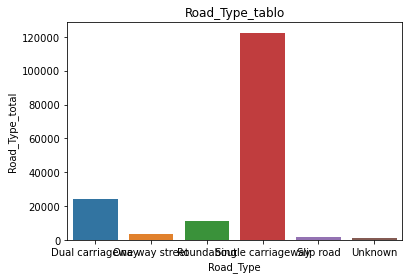

In [578]:
sns.barplot(y = Road_Type_tablo["Road_Type_total"] , x = Road_Type_tablo.index)
plt.title("Road_Type_tablo")

In [549]:
Light_Conditions_tablo

,Light_Conditions_total
Light_Conditions,
Darkeness: No street lighting,9217
Darkness: Street lighting unknown,1602
Darkness: Street lights present and lit,32513
Darkness: Street lights present but unlit,653
Daylight: Street light present,119349


Text(0.5, 1.0, 'Light_Conditions_tablo')

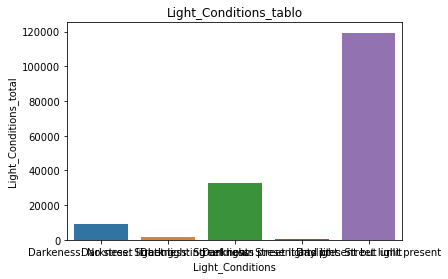

In [579]:
sns.barplot(y = Light_Conditions_tablo["Light_Conditions_total"] , x = Light_Conditions_tablo.index)
plt.title("Light_Conditions_tablo")

In [550]:
Weather_Conditions_tablo

,Weather_Conditions_total
Weather_Conditions,
Fine with high winds,2097
Fine without high winds,128489
Fog or mist,787
Other,4499
Raining with high winds,2384
Raining without high winds,19679
Snowing with high winds,254
Snowing without high winds,1916
Unknown,3229


Text(0.5, 1.0, 'Weather_Conditions_tablo')

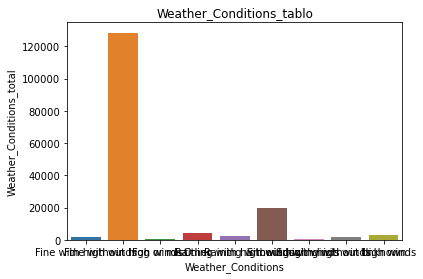

In [580]:
sns.barplot(y = Weather_Conditions_tablo["Weather_Conditions_total"] , x = Weather_Conditions_tablo.index)
plt.title("Weather_Conditions_tablo")

In [551]:
Road_Surface_Conditions_tablo

,Road_Surface_Conditions_total
Road_Surface_Conditions,
Dry,110233
Flood (Over 3cm of water),260
Frost/Ice,5264
Snow,1809
Wet/Damp,45768


Text(0.5, 1.0, 'Yıllara göre kaza sayısı')

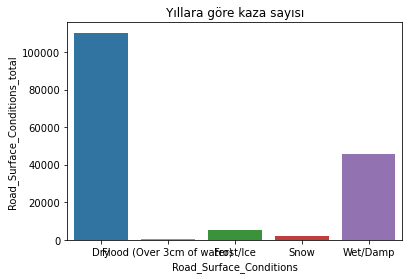

In [561]:
sns.barplot(y = Road_Surface_Conditions_tablo["Road_Surface_Conditions_total"] , x = Road_Surface_Conditions_tablo.index)
plt.title("Yıllara göre kaza sayısı")

In [581]:
### Here is my comment:
### Our Question What increases the Number of Accidents?
### Our answer is as we can read from the charts and the table.
### Reasons for the high number of accidents;
### speed limit is 30,
### road type being single carriageway
### light conditions un daylight: street light present
### weather conditions un fine without high winds
### road surface conditions un dry and wet/Damp

In [583]:
###########################Can we predict accident rates over time?

Text(0.5, 1.0, 'Date_total')

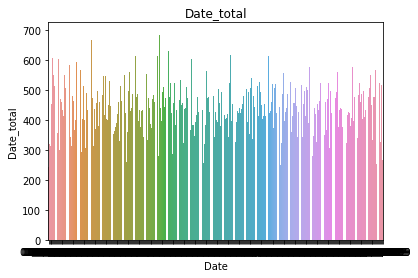

In [586]:
sns.barplot(y = Date_tablo["Date_total"] , x = Date_tablo.index)
plt.title("Date_total")

In [588]:
Date_tablo

,Date_total
Date,
01/01/2009,244
01/02/2009,319
01/03/2009,311
01/04/2009,452
01/05/2009,605
...,...
31/05/2009,446
31/07/2009,523
31/08/2009,325


<AxesSubplot:xlabel='Date'>

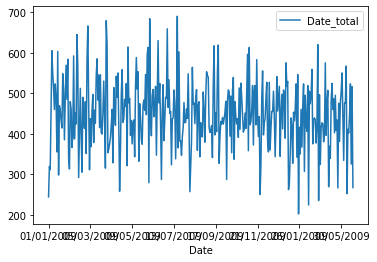

In [596]:
Date_tablo.plot() ## Let's plot the time series graph

In [597]:
## When we look at our chart, we see that it has a straight trend line, and this gives us, on average, over time,
## says it will display a similar score.

In [599]:
Date_tablo.describe()

,Date_total
count,365.000000
mean,447.490411
std,86.544488
min,202.000000
25%,395.000000
50%,448.000000
75%,505.000000
max,690.000000


In [600]:
## describe says that there will be an average of 447 accidents per day here and the lower limit of this is 202 and the upper limit is 690, which can change in this range.(eril)


In [601]:
#How did rural and urban areas differ?

In [609]:
urbanorrural = pd.concat([bir,iki,uc], axis=0)

In [610]:
urbanorrural.Urban_or_Rural_Area
Urban_or_Rural_Area = urbanorrural.groupby("Urban_or_Rural_Area") 
Urban_or_Rural_Area_tablo=pd.DataFrame(Urban_or_Rural_Area.size(),columns=["Urban_or_Rural_Area_total"]) 

In [611]:
Urban_or_Rural_Area_tablo

,Urban_or_Rural_Area_total
Urban_or_Rural_Area,
1,972007
2,532011
3,132


In [612]:
### It is not explained which number is urban or rural, I will address them with their numbers
### There is differentiation and while there were more accidents in the 3rd area, the 1st area was the most accidental.